# Time Series - Final Project
## Evaluating Car Data

## Load the data and look at it

In [1]:
source('https://nmimoto.github.io/R/TS-00.txt')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [2]:
D <- read.csv("https://nmimoto.github.io/datasets/car.csv", header=T)
D

Month,Monthly.car.sales.in.Quebec.1960.1968
<fct>,<int>
1960-01,6550
1960-02,8728
1960-03,12026
1960-04,14395
1960-05,14587
1960-06,13791
1960-07,9498
1960-08,8251
1960-09,7049


## Convert it to a time series and plot it

In [3]:
D1 <- ts(D[,2], start=c(1960,1), freq=12)

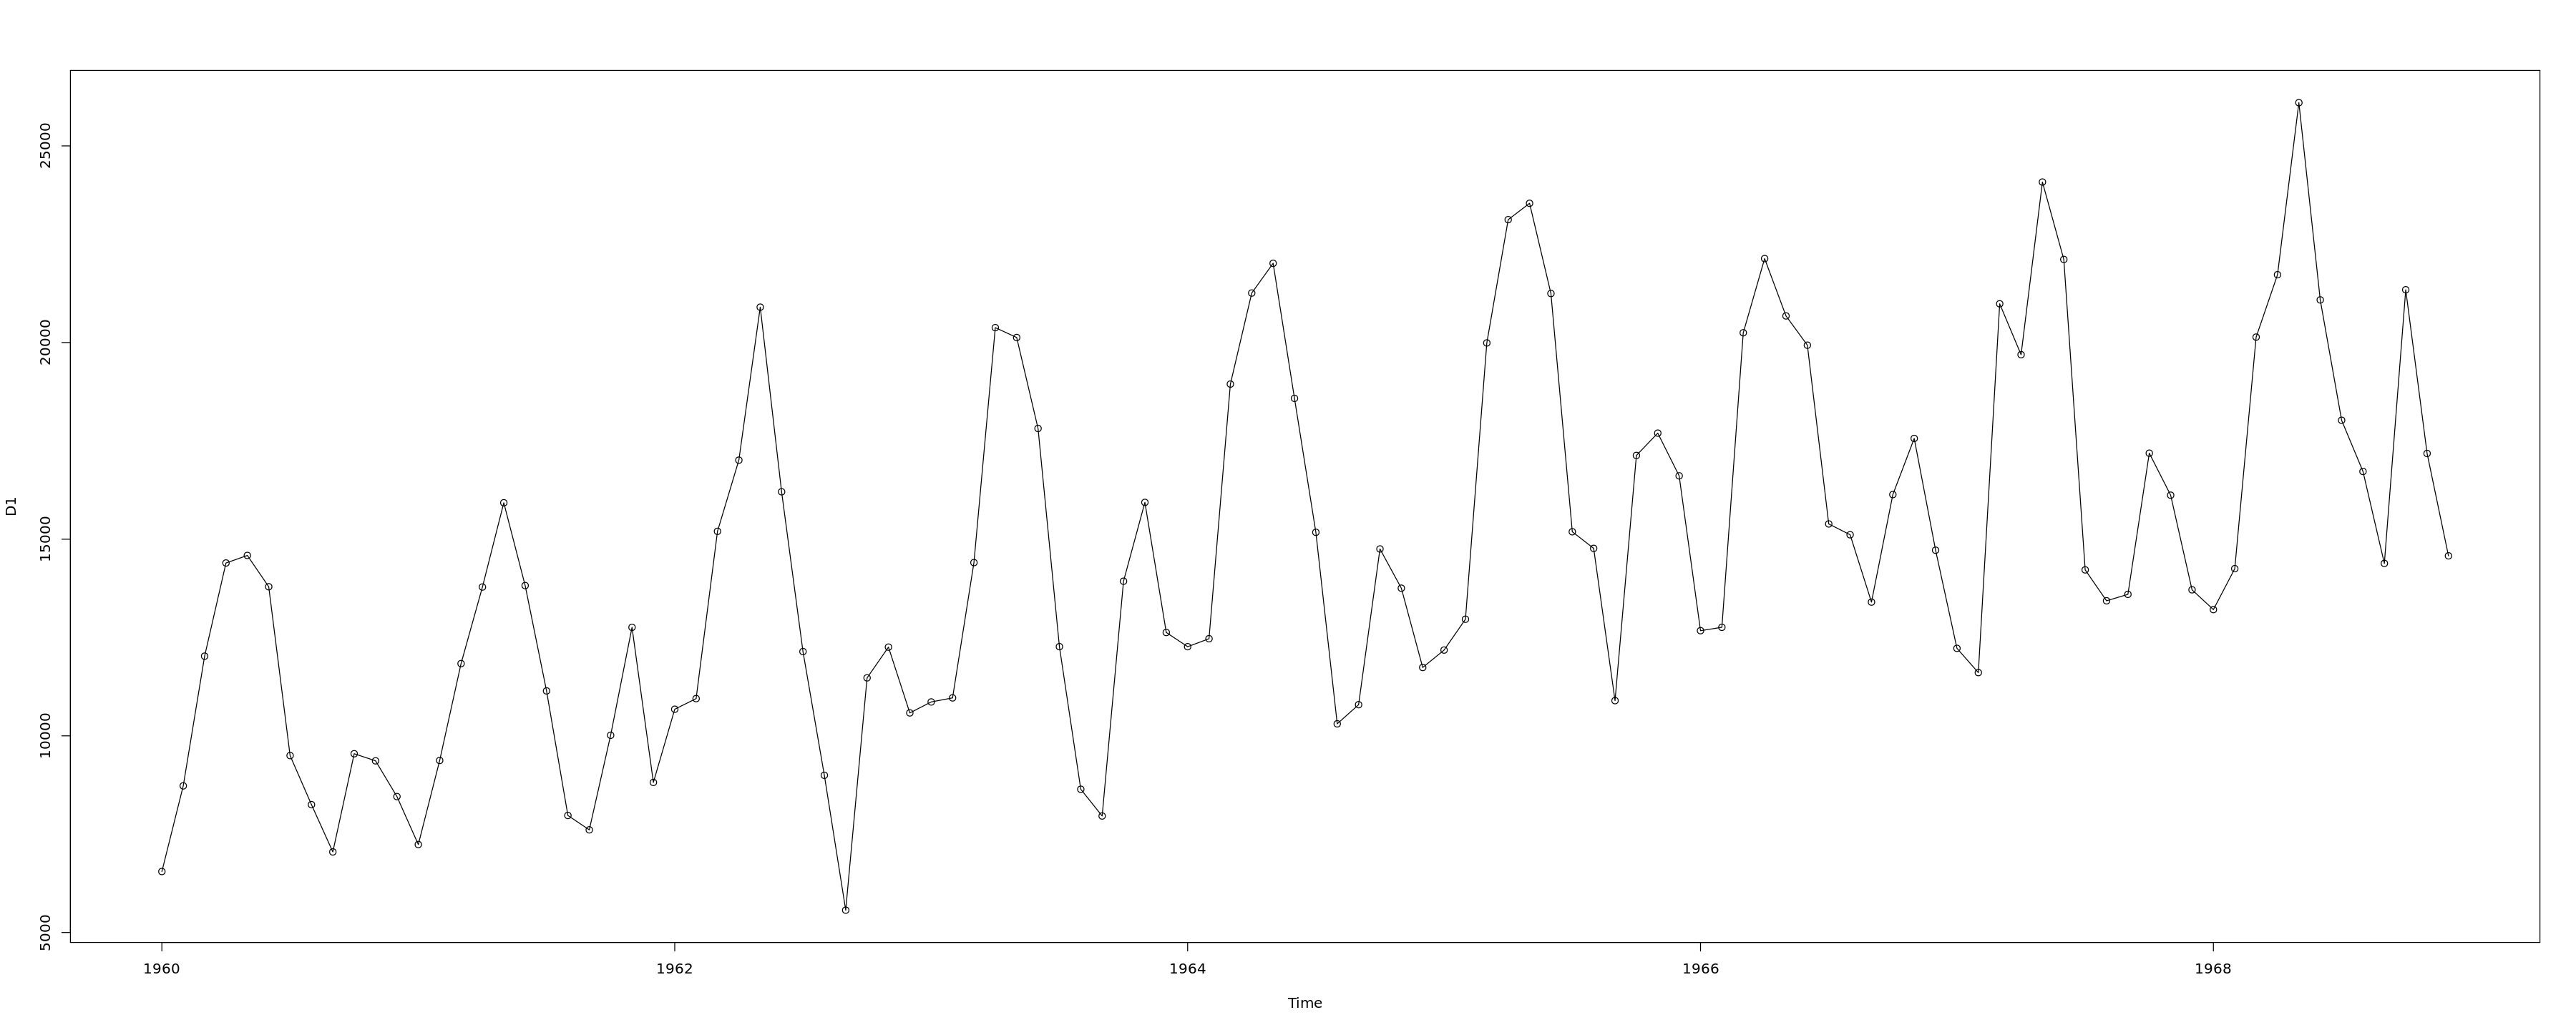

In [4]:
options(repr.plot.width=30, repr.plot.height=12)
plot(D1, type='o')

Looking at the graph, it appears that it is not stationary, but instead is gradually increasing.  It also appears that it may have a seasonal component.

## See what auto.arima() gives

In [5]:
Fit1 <- auto.arima(D1, stepwise = FALSE, approximation = FALSE)
Fit1

Series: D1 
ARIMA(2,0,0)(0,1,2)[12] with drift 

Coefficients:
         ar1     ar2     sma1     sma2    drift
      0.2088  0.1965  -0.5695  -0.2326  83.3338
s.e.  0.1001  0.1009   0.1715   0.1591   8.9502

sigma^2 estimated as 2159951:  log likelihood=-839.05
AIC=1690.09   AICc=1691.04   BIC=1705.48

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.945,0.209,0.347,0.087,0.033,0.81,1354.123


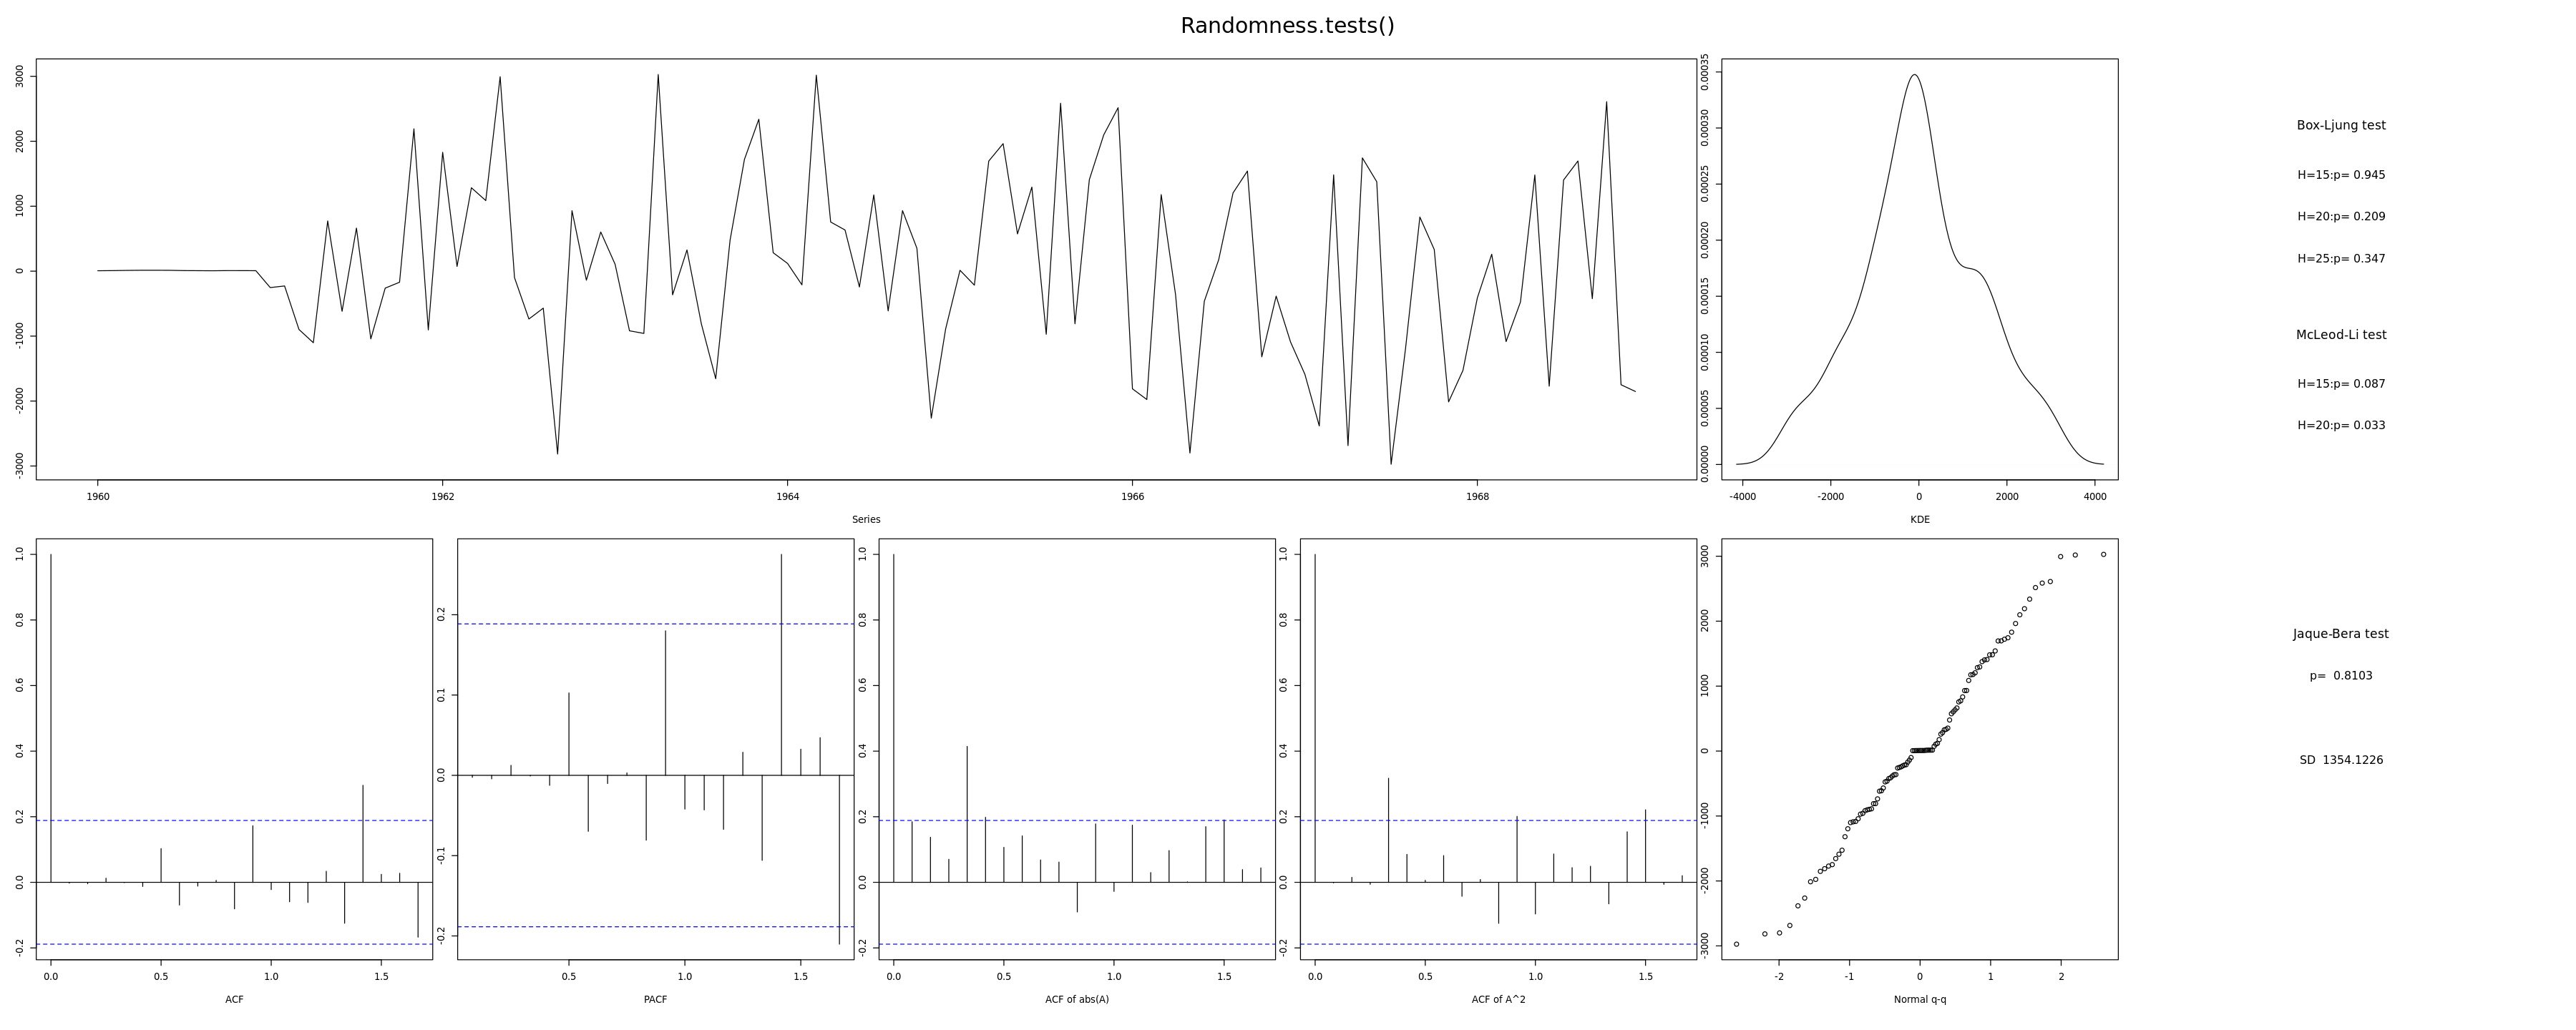

In [6]:
Randomness.tests(Fit1$residuals)

ARIMA(2,0,0)(0,1,2)[12] with drift is the model that auto.arima() suggest.

Looking at the residuals, the p-value of the McLeod-Li tests are low indicating there is still some correlation.  The ACF and PACF plots seem to agree with this.

This is financial data, with increasing variance, so perhaps a log is appropriate.

## Try auto.arima() with lambda=0

In [7]:
Fit2 <- auto.arima(D1, lambda=0, stepwise = FALSE, approximation = FALSE)
Fit2

Series: D1 
ARIMA(2,0,0)(0,1,2)[12] with drift 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1     ar2     sma1     sma2   drift
      0.2283  0.2408  -0.5055  -0.2896  0.0062
s.e.  0.1014  0.1024   0.1724   0.1587  0.0008

sigma^2 estimated as 0.01179:  log likelihood=74.43
AIC=-136.85   AICc=-135.91   BIC=-121.46

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.473,0.286,0.332,0.926,0.856,0.104,0.1


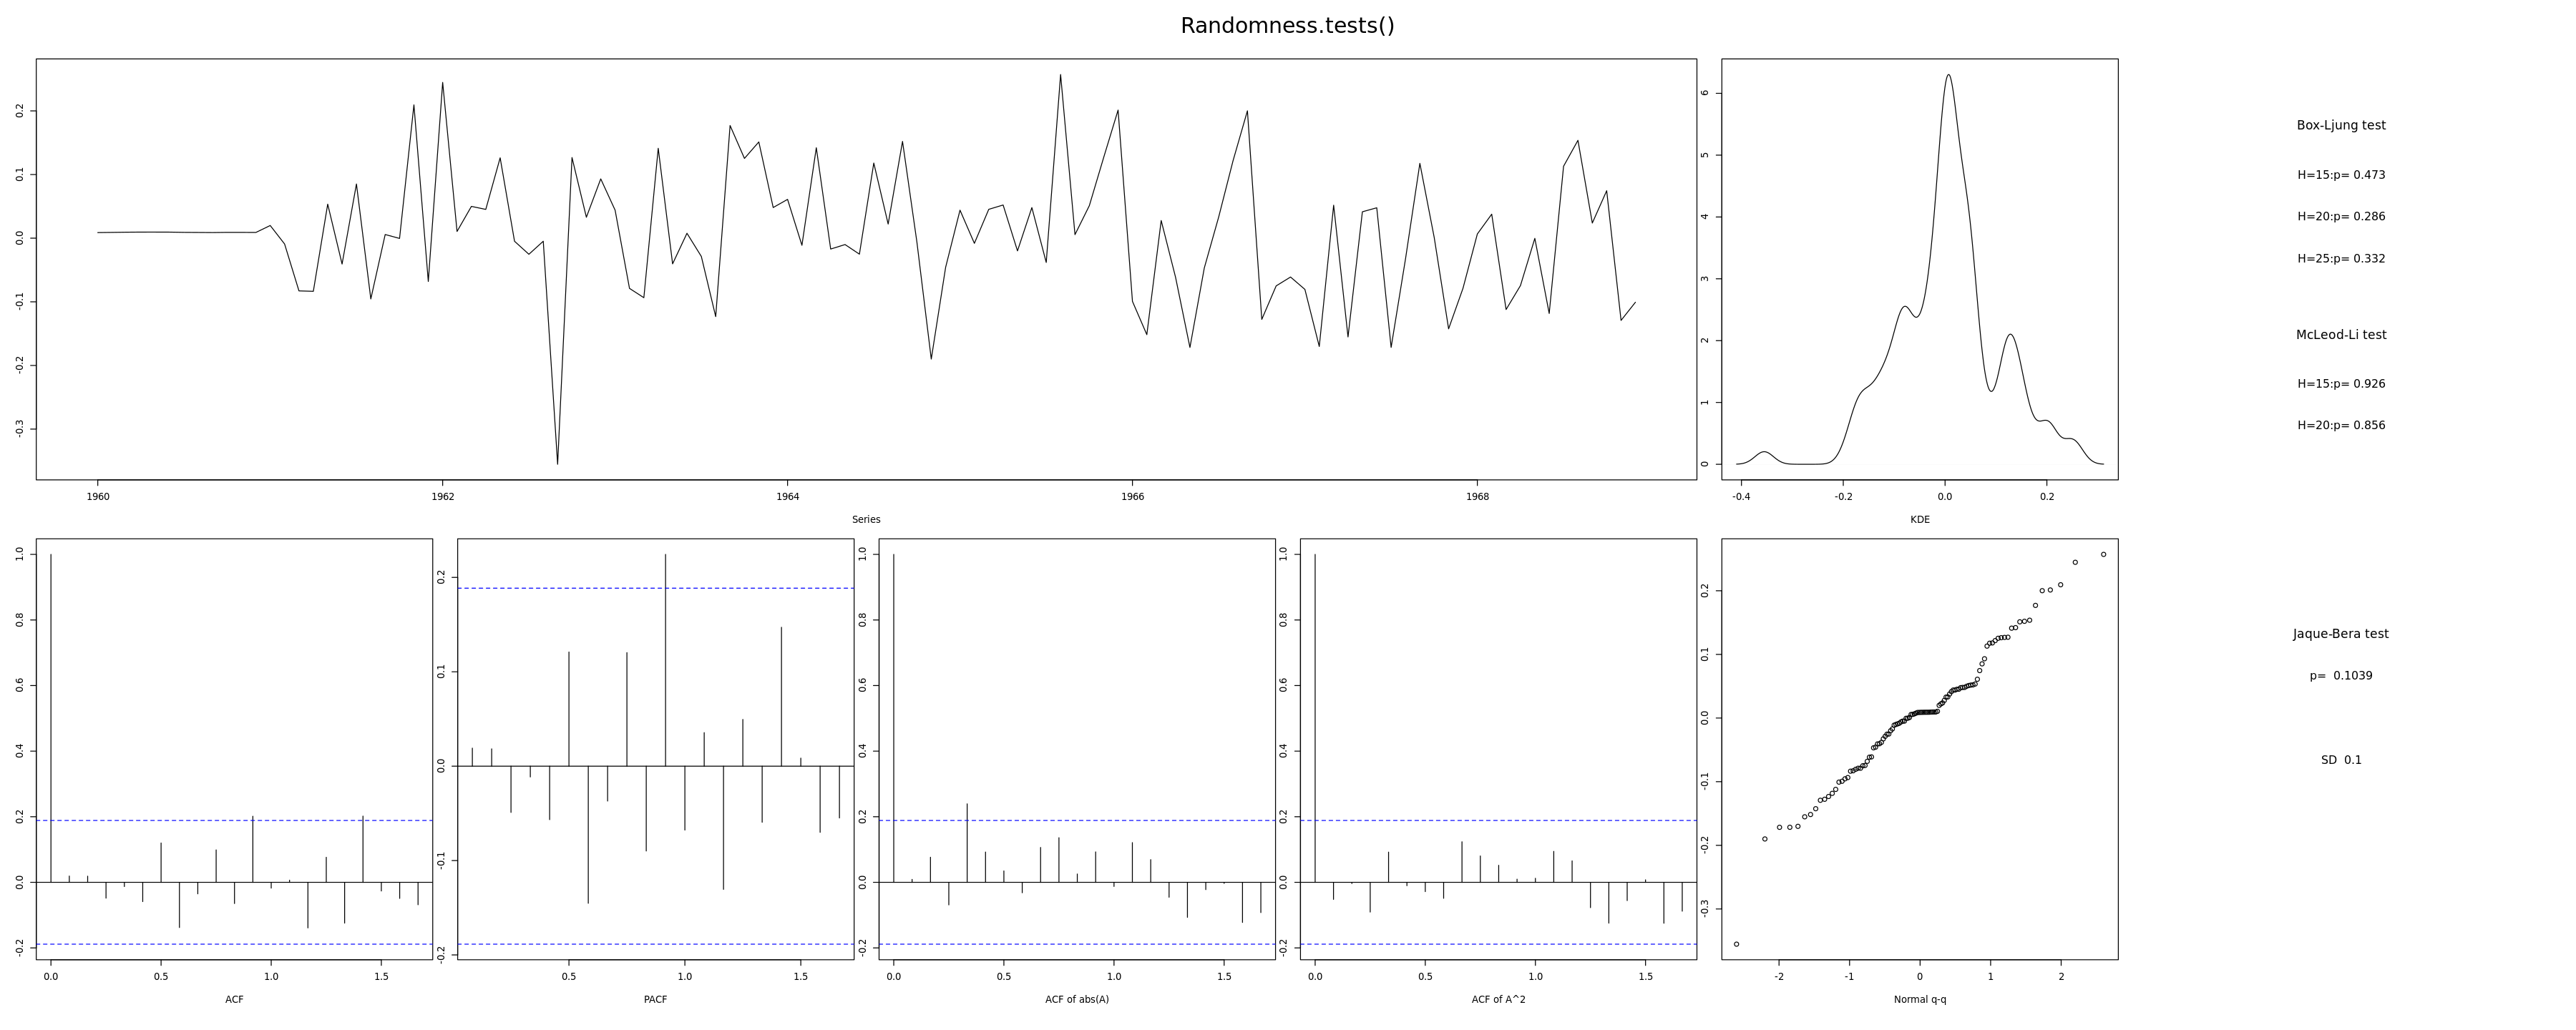

In [8]:
Randomness.tests(Fit2$residuals)

Auto.arima() once again suggest a model of ARIMA(2,0,0)(0,1,2)[12] with drift.

However now the residuals look better, the McLoed-Li p-values have improved, and the ACF graph is better.  However the PACF graph is still slightly concerning.

Overall the model seems adequate.

## Investigate d and D

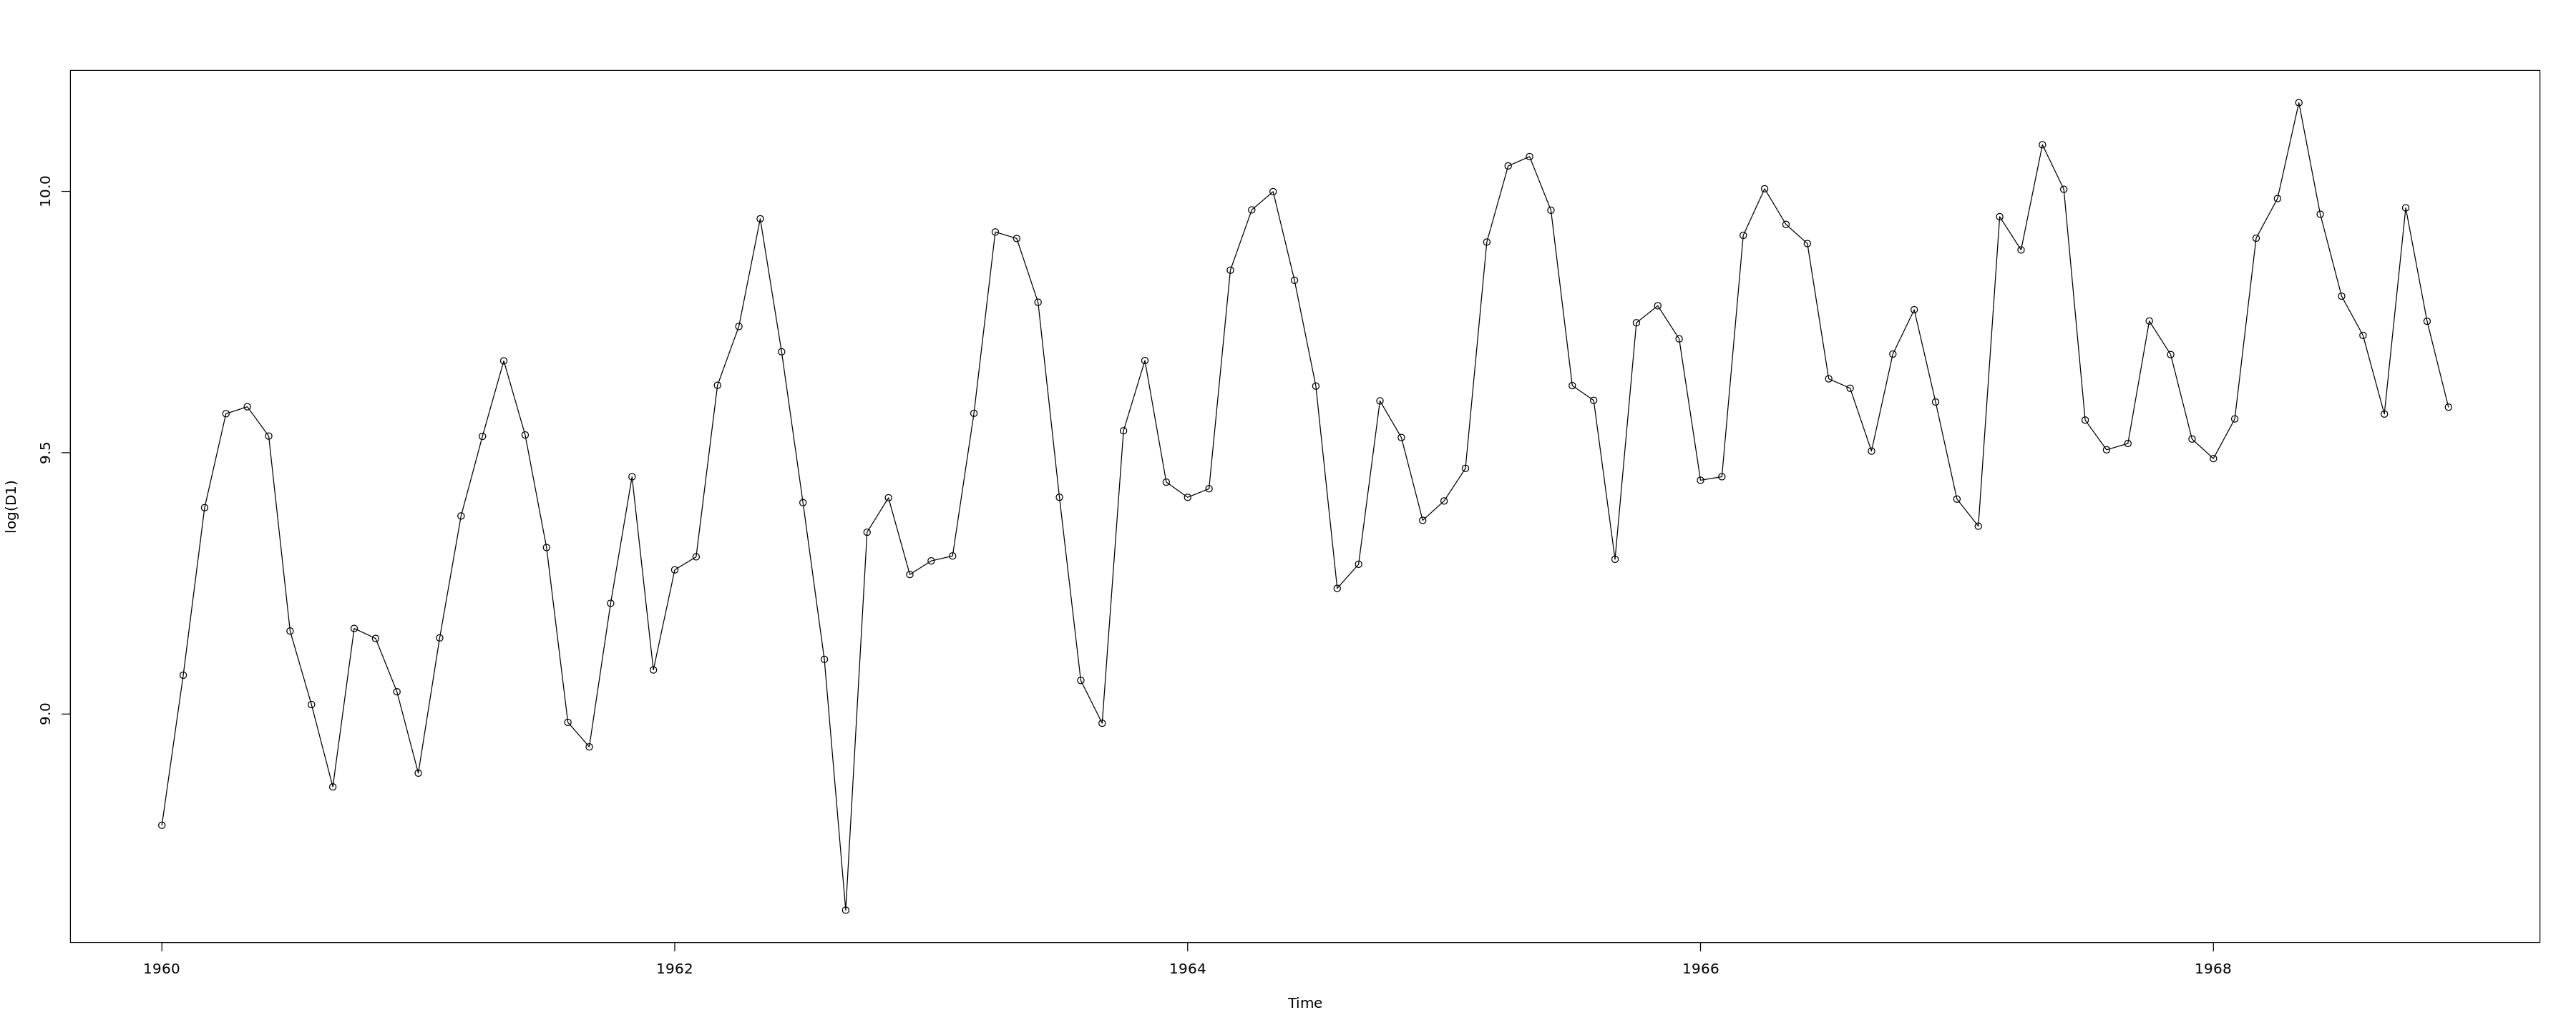

In [9]:
plot(log(D1), type='o')

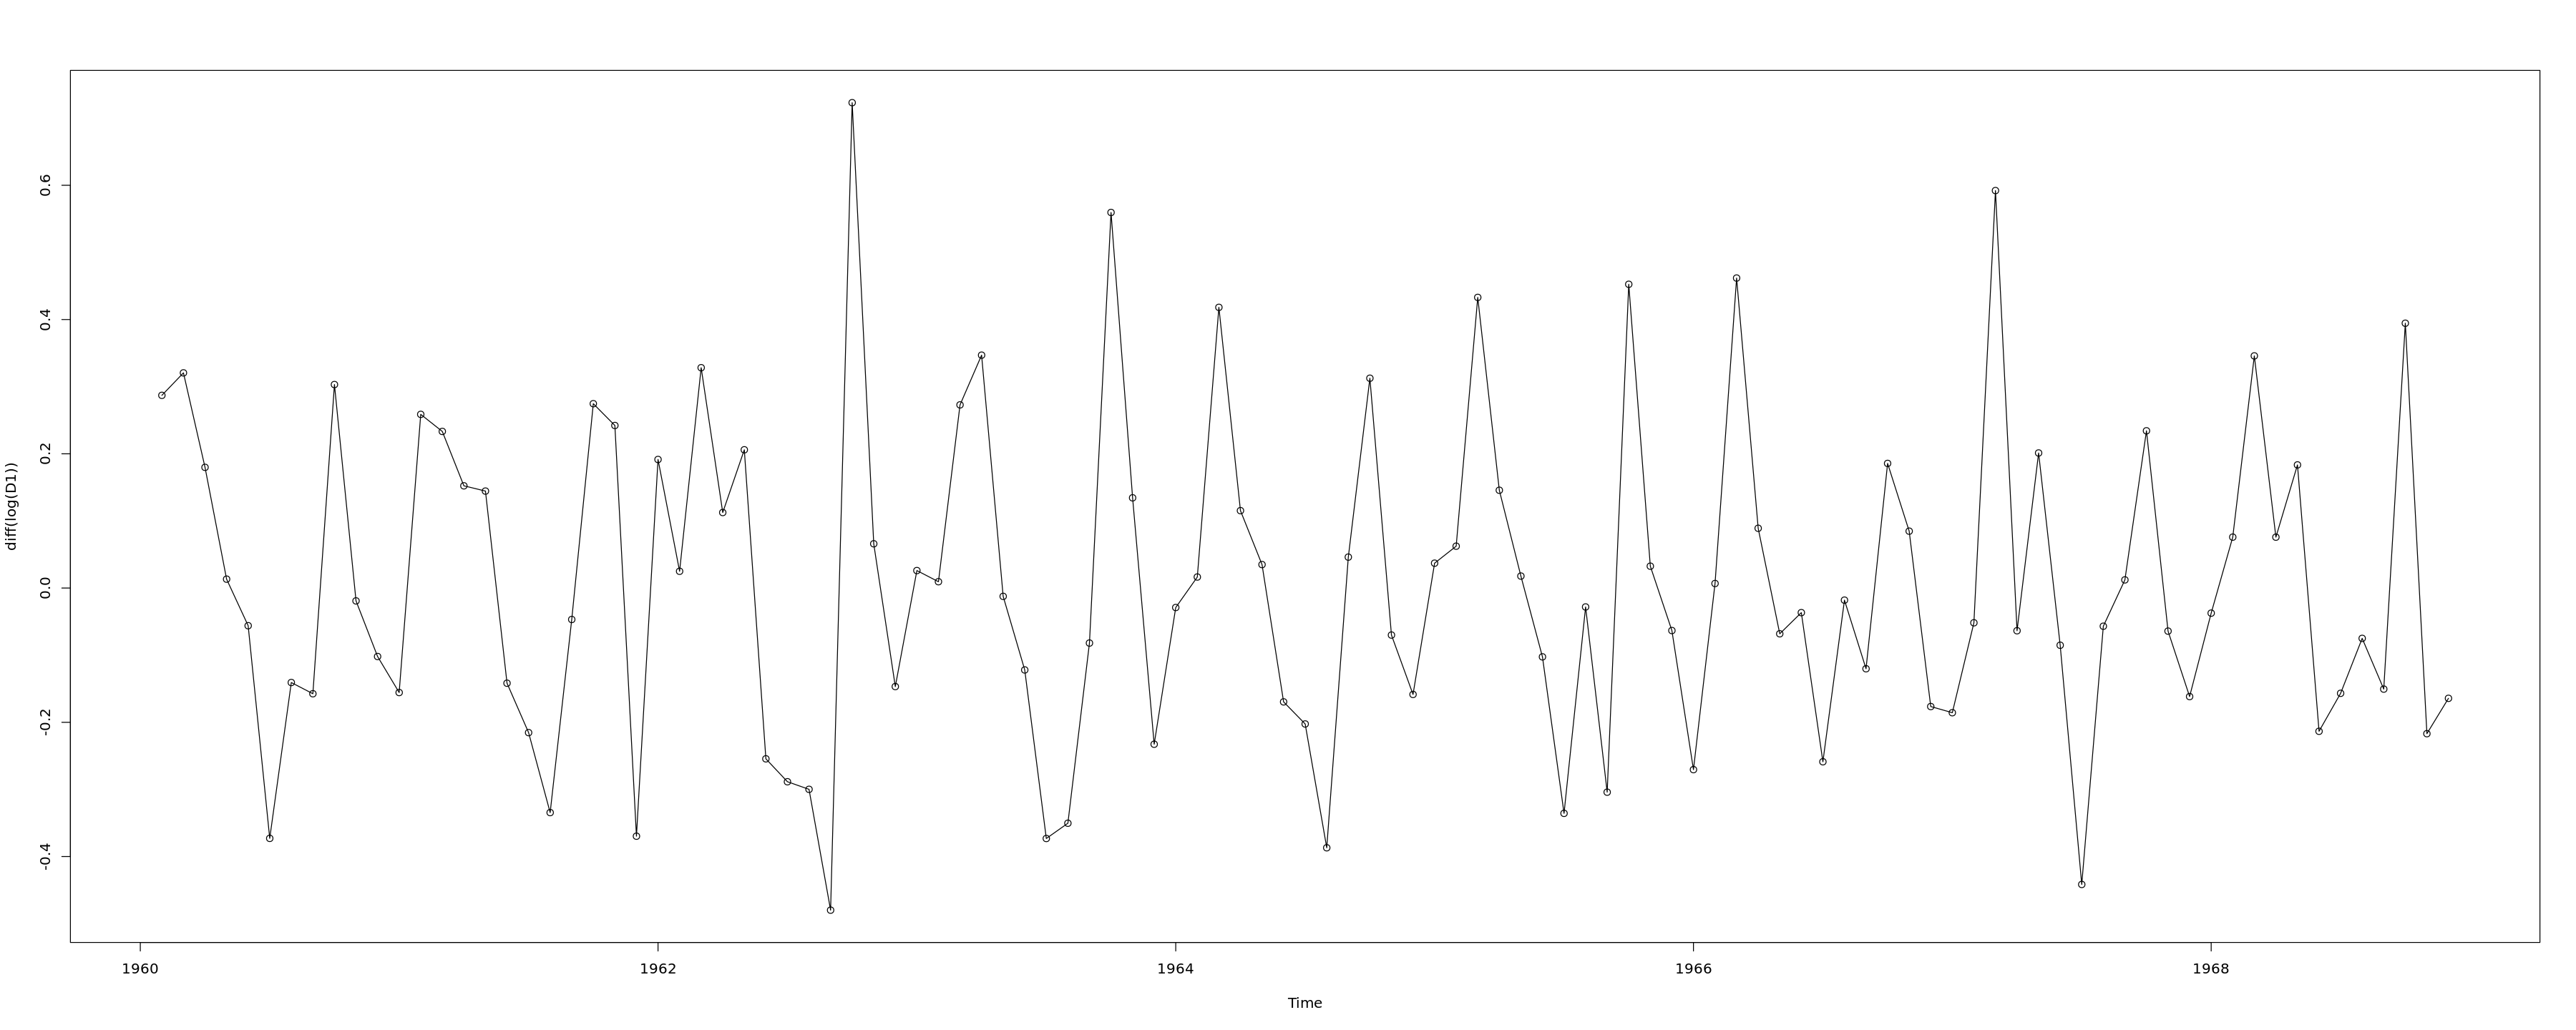

In [10]:
plot(diff(log(D1)), type='o')

In [11]:
Stationarity.tests(diff(log(D1)))

Warning message in adf.test(A):
“p-value smaller than printed p-value”
Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.01,0.01


It is stationary with d=1

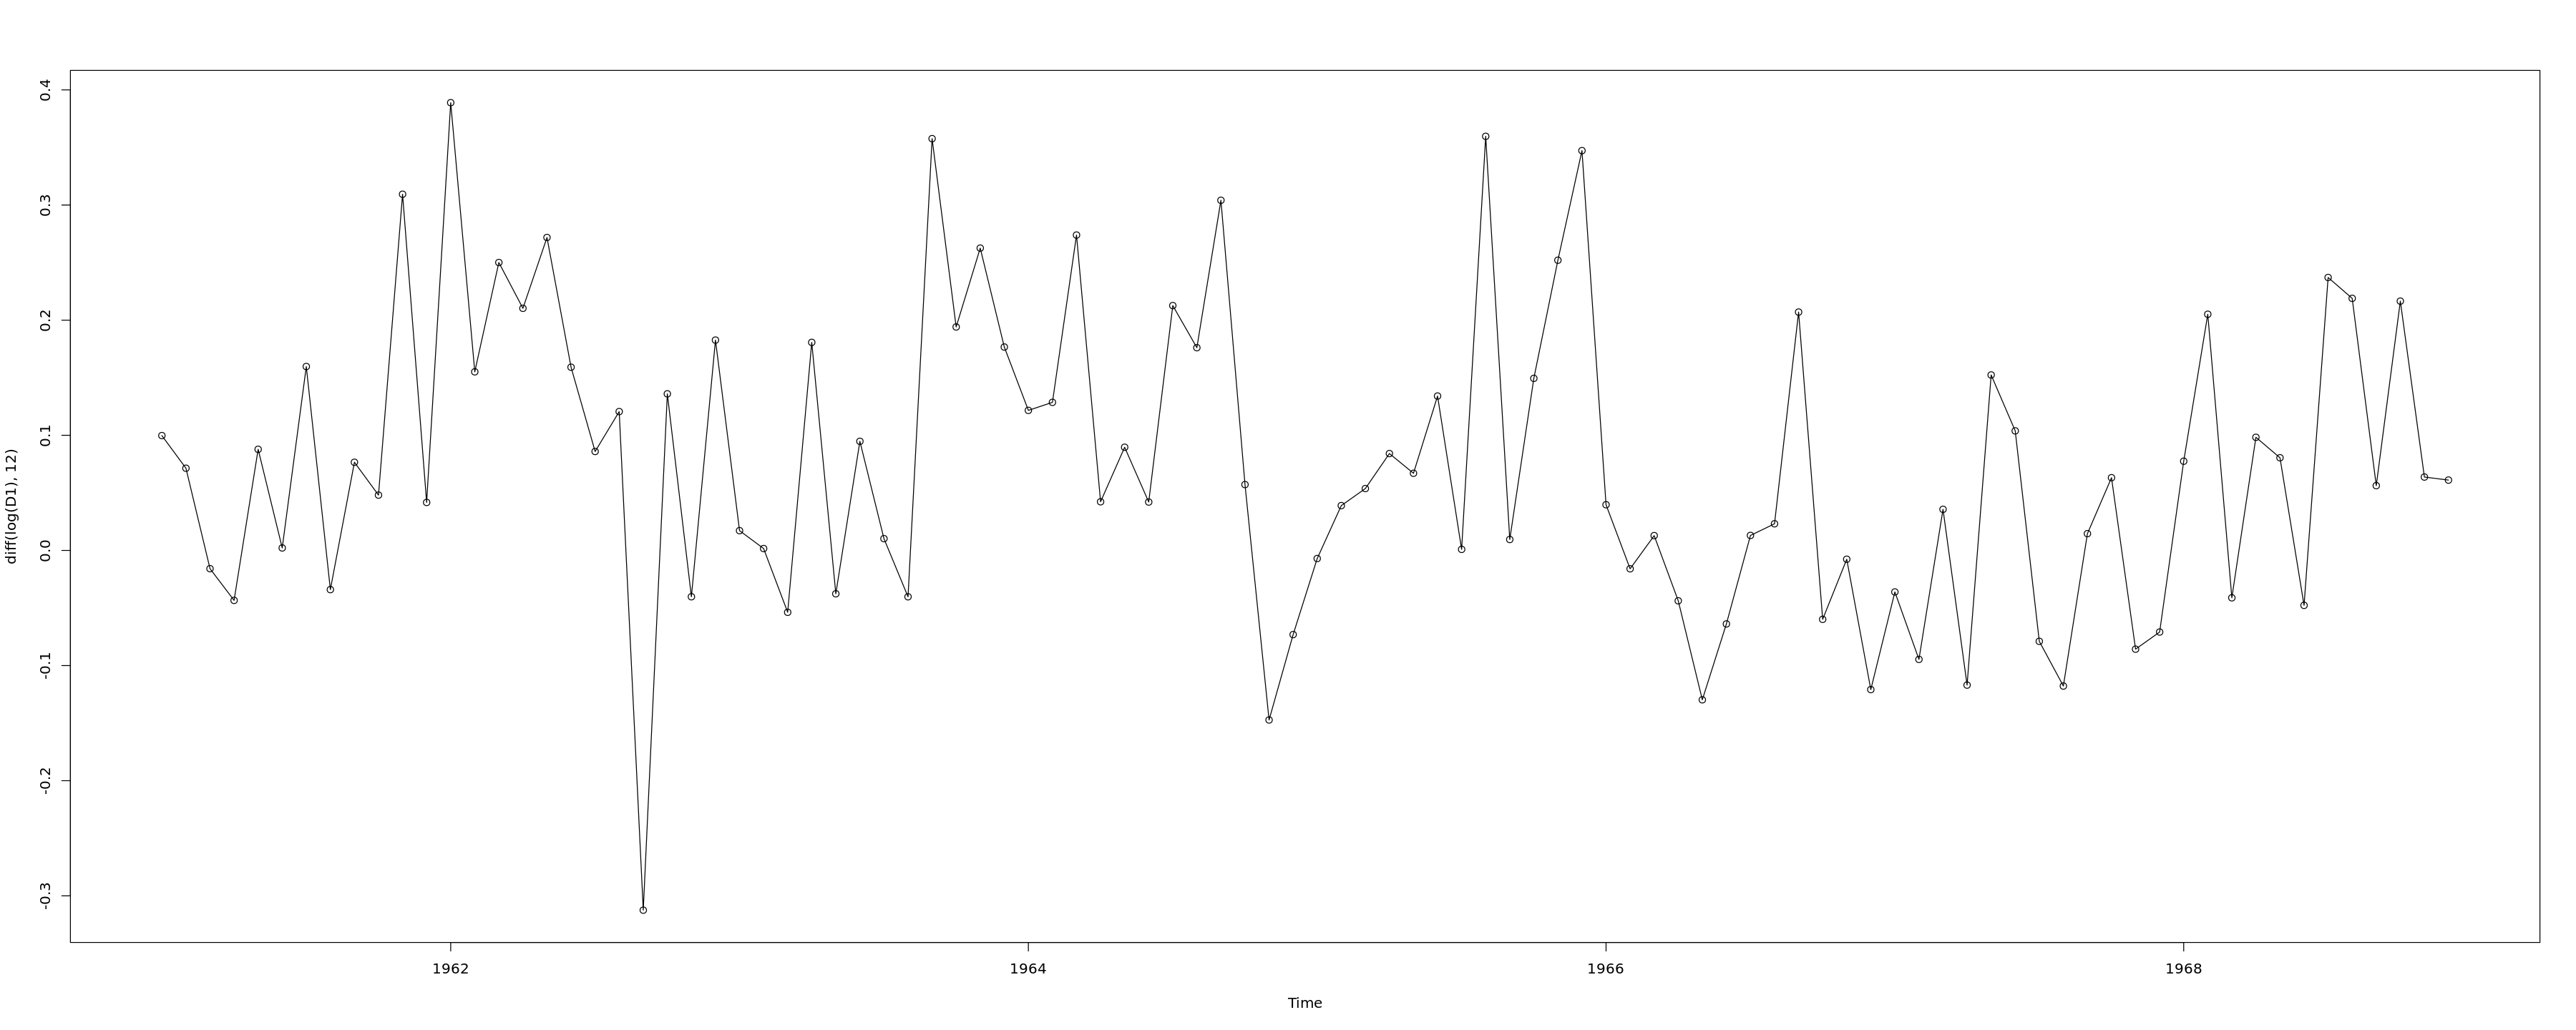

In [12]:
plot(diff(log(D1), 12), type='o')

In [13]:
Stationarity.tests(diff(log(D1), 12))

Warning message in pp.test(A):
“p-value smaller than printed p-value”
Warning message in kpss.test(A):
“p-value greater than printed p-value”


,KPSS,ADF,PP
p-val:,0.1,0.024,0.01


It is stationary with D=1, although the ADF p-value is higher.

## Try it with just d=1 (D=0)

In [14]:
Fit3 <- auto.arima(D1, d=1, D=0, lambda=0, stepwise = FALSE, approximation = FALSE)
Fit3

Series: D1 
ARIMA(0,1,3)(1,0,0)[12] 
Box Cox transformation: lambda= 0 

Coefficients:
          ma1     ma2      ma3    sar1
      -0.7108  0.0702  -0.2772  0.8592
s.e.   0.1014  0.1206   0.0905  0.0439

sigma^2 estimated as 0.01491:  log likelihood=66.93
AIC=-123.85   AICc=-123.26   BIC=-110.49

  B-L test H0: the series is uncorrelated
  M-L test H0: the square of the series is uncorrelated
  J-B test H0: the series came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.535,0.252,0.266,0.982,0.989,0.108,0.119


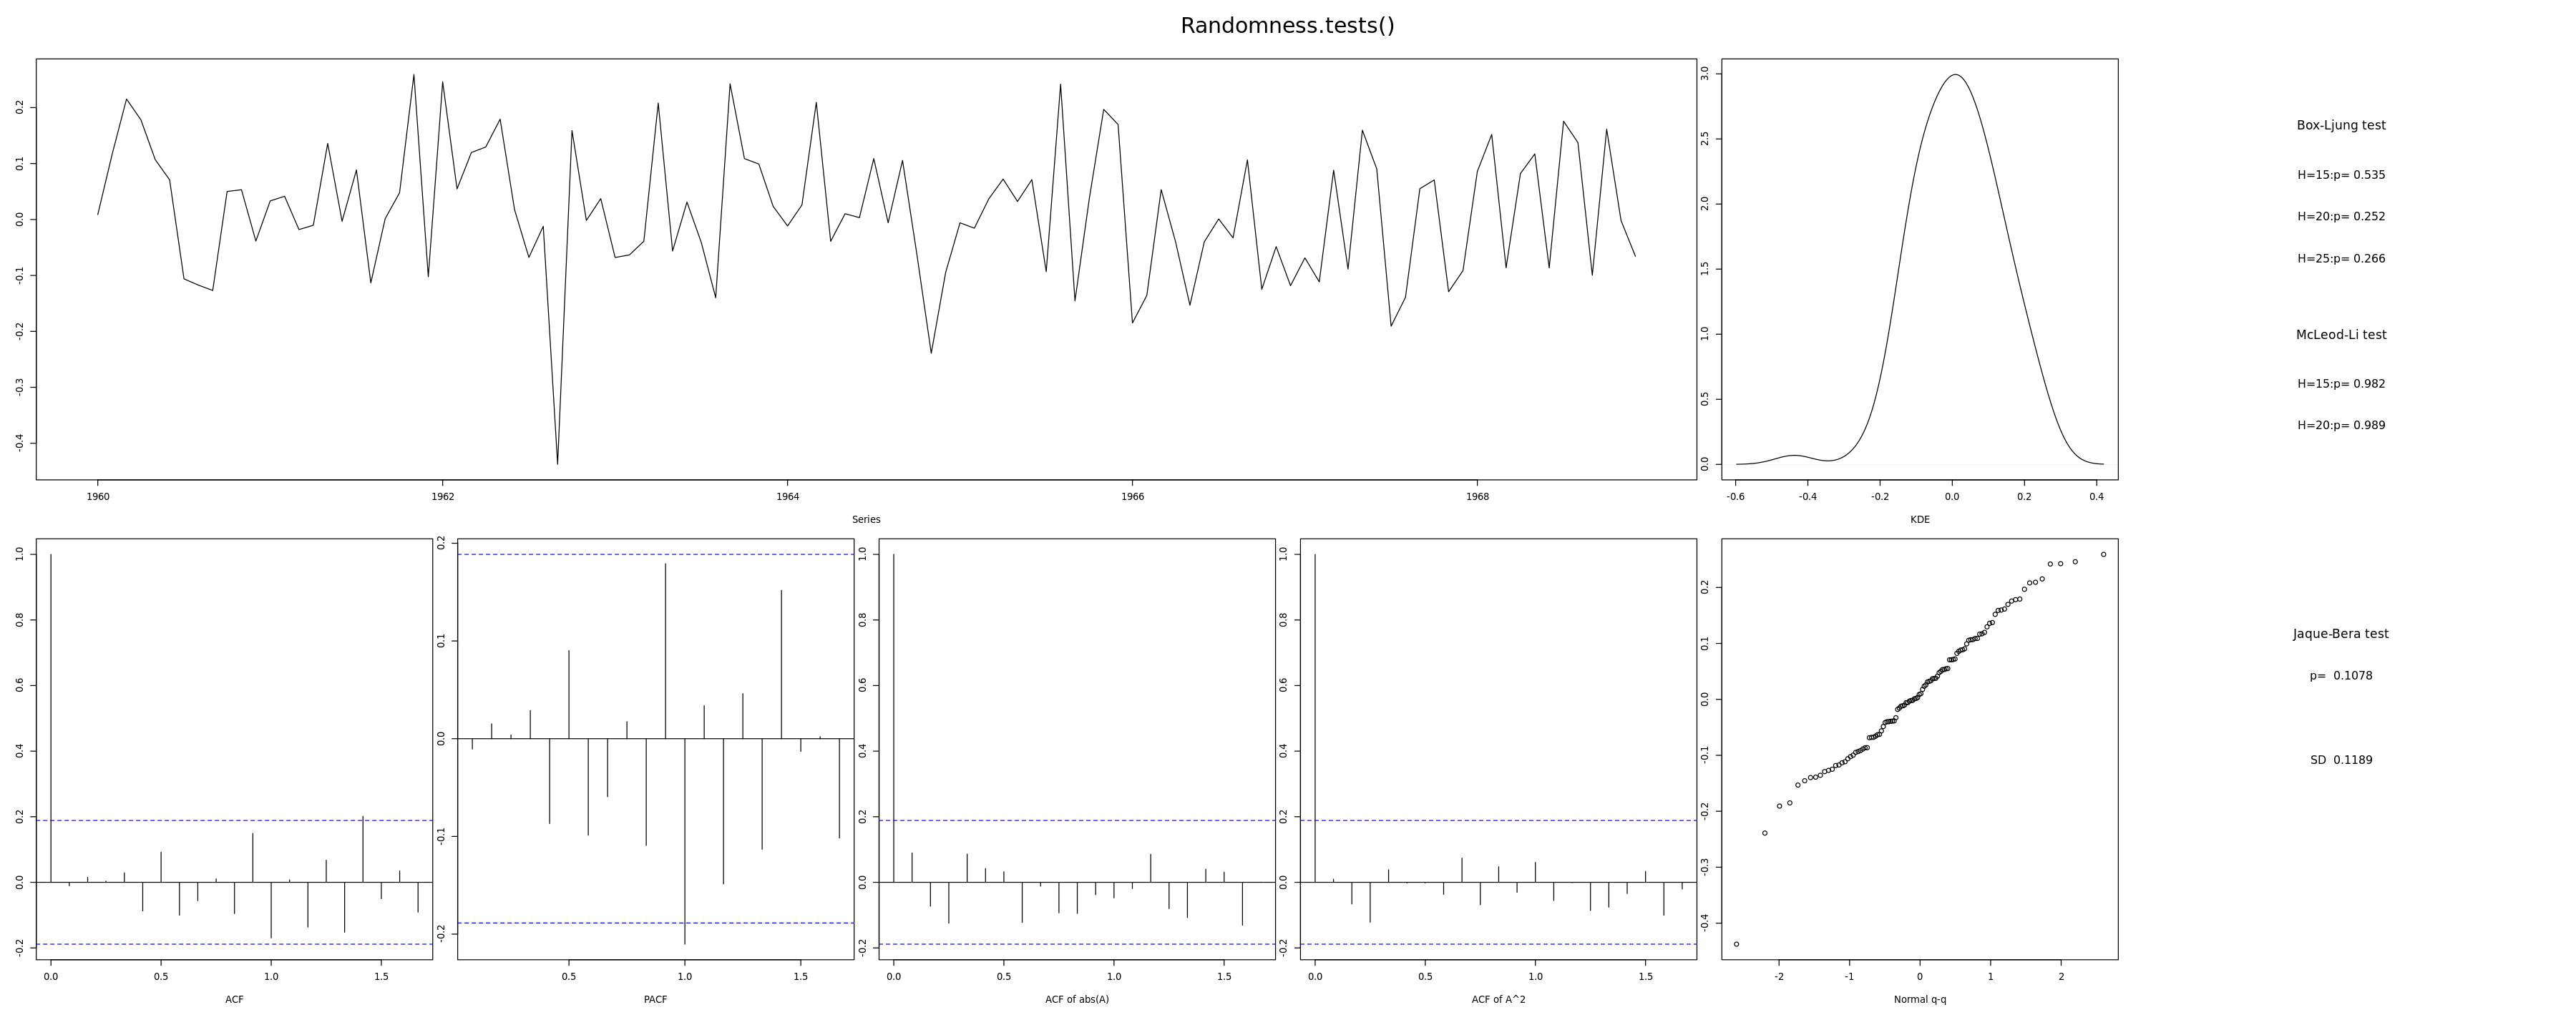

In [15]:
Randomness.tests(Fit3$residuals)

The suggested model is ARIMA(0,1,3)(1,0,0)[12]

The residuals still look good, though the PACF graph is still slightly concerning.

The AICc value is higher.